In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import re

2025-08-15 14:42:47.392573: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755268967.571747      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755268967.626616      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv('/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv',encoding = 'latin',header=None)
df.head(10)

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?


In [3]:
df.columns = ['sentiment', 'id', 'date', 'query', 'user_id', 'text']
df.head(10)

,sentiment,id,date,query,user_id,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?


In [4]:
df = df.drop(['id' , 'date' , 'query' , 'user_id'],axis=1)

In [5]:
df.head(10)

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
5,0,@Kwesidei not the whole crew
6,0,Need a hug
7,0,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,@Tatiana_K nope they didn't have it
9,0,@twittera que me muera ?


In [6]:
scrabble_df = df[df['text'].str.lower().str.contains(r'\bscrabble\b', case=False, na=False) & df['sentiment'].notna()]

In [7]:
lab_to_sentiment = {0:"Negative", 4:"Positive"}
def label_decoder(label):
  return lab_to_sentiment[label]
scrabble_df.sentiment = scrabble_df.sentiment.apply(lambda x: label_decoder(x))
scrabble_df.head(10)


/tmp/ipykernel_36/3978509977.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scrabble_df.sentiment = scrabble_df.sentiment.apply(lambda x: label_decoder(x))


,sentiment,text
12944,Negative,Something I haven't done in ages; woken up in ...
71714,Negative,playing scrabble with my lil sis. I am still s...
92563,Negative,@matt_brittain lol ya right im terrible at scr...
95991,Negative,@pagankinktress PS: i'm trying to rope in more...
106676,Negative,haha im playing scrabble on facebook seriously...
108690,Negative,"@InNoSenseLost LOL, I know...im getting old\t ..."
108823,Negative,Just lost a game of scrabble
118850,Negative,Yea I lost scrabble to a seven year old... Buu...
120158,Negative,Playing scrabble on the deck and losing badly ...
121645,Negative,playing scrabble for money with mommy! lol she...


In [8]:
scrabble_df.sample(10)

,sentiment,text
438344,Negative,Sunday morning scrabble...I lost this one Tim...
1144125,Positive,i feel so perfectly content i got to play wat...
118850,Negative,Yea I lost scrabble to a seven year old... Buu...
1101018,Positive,"@lauralassiter OMG, I thought mine were alot ..."
1181019,Positive,neither sleep nor read.. i m playin Scrabble w...
821099,Positive,"@Wossy goodnight JR, I am playing scrabble on ..."
71714,Negative,playing scrabble with my lil sis. I am still s...
701052,Negative,@tinybabybolster: I think it takes a little t...
1386354,Positive,I thae rodws nma. I uhgthot I dha a rpteyt gbi...
934781,Positive,@MickHD Hi playing scrabble and drinking wine...


In [9]:
scrabble_df.shape

(109, 2)

### 109 tweets regarding scrabble

[]

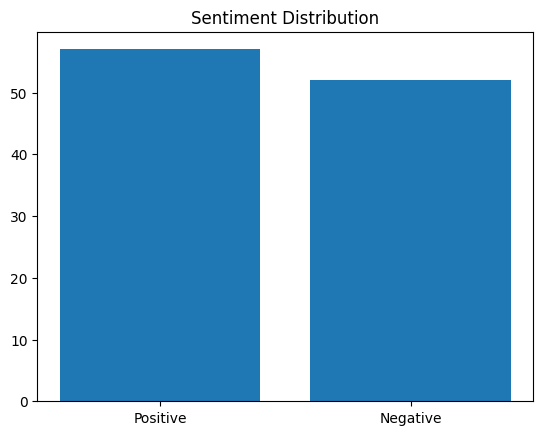

In [10]:
val_counts = scrabble_df.sentiment.value_counts()
plt.bar(val_counts.index , val_counts.values)
plt.title("Sentiment Distribution")
plt.plot()

In [11]:
scrabble_df.sample(20)

,sentiment,text
373936,Negative,this scrabble game is not goinng to well [get...
636636,Negative,@RouBBoY ur not seeing me in scrabble or uno s...
815731,Positive,@A_La_Rue never tried computer scrabble (maybe...
1375232,Positive,It's Friday night and I just got done playing ...
481495,Negative,"@ charlobo boo, no bella but yay for hand-me-..."
992654,Positive,@zedrale It's rad. I might retweet it. Don't t...
1027416,Positive,Promoting my new etsy site! check it out! scra...
1400860,Positive,@angandrada Nice! Sorry for the late reply. E...
950005,Positive,@faerye no amount of subsequent practice can ...
1538936,Positive,@AncientSoul Gasp - Scrabble is a radical righ...


## cleaning tweet data using nltk

In [12]:
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')

text_clean_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+" # for removing @ , links , alphanumerics
def clean_text(text): # removing stop words & applying stemmer
    text = re.sub(text_clean_re , ' ' , text.lower()).strip()
    tokens=[]
    for token in text.split():
        if token not in stop_words:
            tokens.append(stemmer.stem(token))
    return " ".join(tokens)

In [13]:
scrabble_df.text = scrabble_df.text.apply(lambda x: clean_text(x))

/tmp/ipykernel_36/2803102164.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scrabble_df.text = scrabble_df.text.apply(lambda x: clean_text(x))


In [14]:
scrabble_df.sample(20)

,sentiment,text
1170398,Positive,say play scrabbl gale ni zack
666032,Negative,ars total kick shop scrabbl
1303156,Positive,want board game scrabbl come rape fun time
782963,Negative,delet fb pwned scrabbl
1334810,Positive,play speed scrabbl
294438,Negative,want play scrabbl amp everyon big ball pansi s...
92563,Negative,lol ya right im terribl scrabbl
438344,Negative,sunday morn scrabbl lost one time walk lunchzi...
1027416,Positive,promot new etsi site check scrabbl tile jewelr...
106676,Negative,haha im play scrabbl facebook serious love im ...


# Creating wordclouds

In [15]:
from wordcloud import WordCloud

### positive

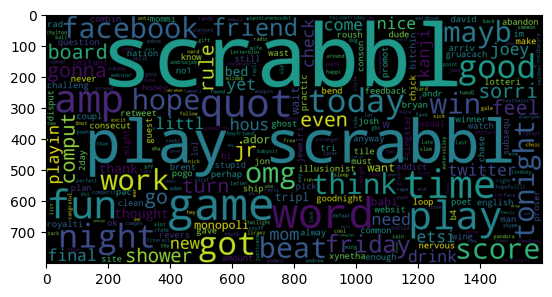

In [16]:
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(scrabble_df[scrabble_df.sentiment=='Positive'].text))
plt.imshow(wc)

### Negative

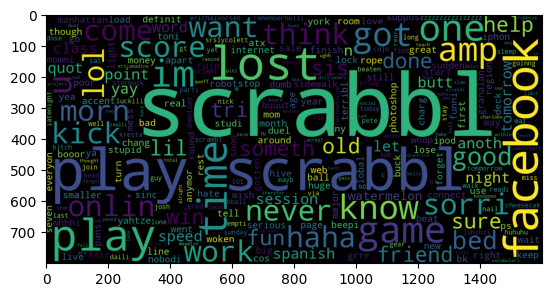

In [17]:
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(scrabble_df[scrabble_df.sentiment=='Negative'].text))
plt.imshow(wc)

In [18]:
label2id = {"Negative":0 , "Positive":1}
id2label = {0: "negative", 1: "positive"}
scrabble_df['sentiment'] = scrabble_df['sentiment'].map(label2id)

/tmp/ipykernel_36/4094013469.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scrabble_df['sentiment'] = scrabble_df['sentiment'].map(label2id)


In [19]:
scrabble_df.sample(10)

,sentiment,text
92563,0,lol ya right im terribl scrabbl
261415,0,facebook hate tell scrabbl live us play
1554521,1,ooh yeah scrabbl
170677,0,poor toni come play scrabbl facebook
867708,1,omg 60 scrabbl instant win game nation lotteri...
636636,0,ur see scrabbl uno sorri fall back n u got wor...
419130,0,sab amp kim sorri join u guy last night scrabb...
297306,0,play scrabbl via facebook w kresta bitch good
108690,0,lol know im get old atx rest month though defi...
821099,1,goodnight jr play scrabbl facebook still fun e...


In [20]:
train_df, test_df = train_test_split(scrabble_df, test_size=0.2, random_state=42)

In [21]:
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 10.4 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.5.1
    Uninstalling fsspec-2025.5.1:
      Successfully uninstalled fsspec-2025.5.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.8.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvid

In [22]:
from datasets import Dataset
import evaluate
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer

In [23]:
train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)

model_name = "cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(model_name)

config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

In [38]:
def tokenize(batch):
    return tokenizer(batch["text"], padding=True, truncation=True)

train_dataset = train_dataset.map(tokenize, batched=True)
test_dataset = test_dataset.map(tokenize, batched=True)

# HF ROBERTa model expects labels
train_dataset = train_dataset.rename_column("sentiment", "labels")
test_dataset = test_dataset.rename_column("sentiment", "labels")

Map:   0%|          | 0/87 [00:00<?, ? examples/s]

Map:   0%|          | 0/22 [00:00<?, ? examples/s]

### Loading Huggingface RoabertA model

In [25]:
model = AutoModelForSequenceClassification.from_pretrained(
    model_name,
    num_labels=2,
    id2label=id2label,
    label2id=label2id,
    ignore_mismatched_sizes=True # HF model trained for Pos/Neg/Neutral
)

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest and are newly initialized because the shapes did not match:
- classifier.out_proj.weight: found shape torch.Size([3, 768]) in the checkpo

In [26]:
accuracy = evaluate.load("accuracy")
f1 = evaluate.load("f1")

model.safetensors:   0%|          | 0.00/501M [00:00<?, ?B/s]

### argmax predictions and feed to accuracy & f1 evaluators

In [27]:
def compute_metrics(p):
    preds = np.argmax(p.predictions, axis=1)
    acc = accuracy.compute(predictions=preds, references=p.label_ids)
    f1_score = f1.compute(predictions=preds, references=p.label_ids, average="weighted")
    return {"accuracy": acc["accuracy"], "f1": f1_score["f1"]}

### Set Training Arguments

In [52]:
args = TrainingArguments(
    output_dir="/kaggle/working/scrabble_sentiment_analyzer",
    run_name="scrabble_sentiment_v1",
    eval_strategy="steps",
    eval_steps=50,
    save_strategy="steps",
    save_steps=50,
    logging_steps=10,
    learning_rate=2e-5,
    per_device_train_batch_size=4,  # Reduced batch size
    per_device_eval_batch_size=4,
    num_train_epochs=10,  # Reduced epochs for testing
    weight_decay=0.01,
    warmup_steps=100,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    greater_is_better=True,
    report_to="none",  # Disable wandb logging
    dataloader_num_workers=0,  # Disable multiprocessing
)

### using HF trainer

In [53]:
trainer = Trainer(
    model=model,
    args=args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)
trainer.train()

/tmp/ipykernel_36/2177231600.py:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Step,Training Loss,Validation Loss,Accuracy,F1
50,0.365600,0.581529,0.681818,0.671420
100,0.341300,2.167698,0.545455,0.545455
150,0.002600,1.855900,0.727273,0.712662
200,0.001000,2.206464,0.636364,0.630148


TrainOutput(global_step=220, training_loss=0.18064519520425662, metrics={'train_runtime': 26.0401, 'train_samples_per_second': 33.41, 'train_steps_per_second': 8.449, 'total_flos': 22801245168600.0, 'train_loss': 0.18064519520425662, 'epoch': 10.0})

In [54]:
trainer.save_model("/kaggle/working/scrabble_sentiment_analyzer")
tokenizer.save_pretrained("/kaggle/working/scrabble_sentiment_analyzer")

('/kaggle/working/scrabble_sentiment_analyzer/tokenizer_config.json',
 '/kaggle/working/scrabble_sentiment_analyzer/special_tokens_map.json',
 '/kaggle/working/scrabble_sentiment_analyzer/vocab.json',
 '/kaggle/working/scrabble_sentiment_analyzer/merges.txt',
 '/kaggle/working/scrabble_sentiment_analyzer/added_tokens.json',
 '/kaggle/working/scrabble_sentiment_analyzer/tokenizer.json')

### Testing model using pipeline (load & predict)

In [58]:
from transformers import pipeline
model_1 = pipeline("text-classification" , model="/kaggle/working/scrabble_sentiment_analyzer")
print(model_1("Scrabble cheaters ruin the game for everyone else"))

Device set to use cuda:0


[{'label': 'negative', 'score': 0.9994450211524963}]


## Deploying model to web using HuggingFace Spaces

In [60]:
import gradio as gr
clf = pipeline("text-classification", model="/kaggle/working/scrabble_sentiment_analyzer", tokenizer="/kaggle/working/scrabble_sentiment_analyzer")

def predict_sentiment(text):
    return clf(text)[0]['label']

iface = gr.Interface(fn=predict_sentiment, inputs="text", outputs="label", title="Scrabble Sentiment Classifier")
iface.launch()

Device set to use cuda:0


* Running on local URL:  http://127.0.0.1:7860
It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

* Running on public URL: https://7cb1728ab3a4bf121d.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
